In [1]:
%load_ext autoreload
%autoreload 2

# Define autoreload so that we don't have to reset the kernel every time after changing the files

In [2]:
# Define the system paths
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parents[3] # Gets the GitHub repo folder
print(project_root)
sys.path.append(str(project_root))

# Import modules

import pandas as pd
import matplotlib.pyplot as plt

C:\SenkDosya\Projects\FINCH-Science_SyntheticData


In [3]:
# Import code

from defs.diffusion.helper.noising.noising import *

In [4]:
# Import data

df = pd.read_csv(r'C:\SenkDosya\UTAT\Data\General_Data\simpler_data_rwc.csv')

data = torch.tensor(df.iloc[:, 7:].to_numpy(dtype=np.float64))

print(type(data))


<class 'torch.Tensor'>


In [5]:
T=2000

C:\SenkDosya\Projects\FINCH-Science_SyntheticData\defs\diffusion\helper\noising\noising.py:233: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.alpha_bars = torch.tensor(f/f_0, dtype=torch.float32) # Normalize by f_0 and store as alpha bars
C:\Users\egear\AppData\Local\Temp\ipykernel_25504\1850151573.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trial_spectrum = torch.tensor(data[0,])


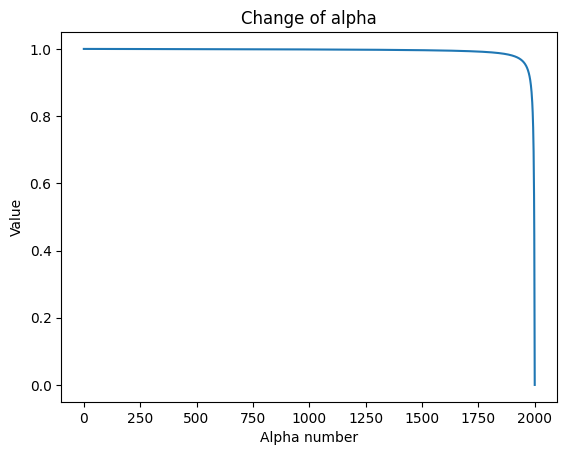

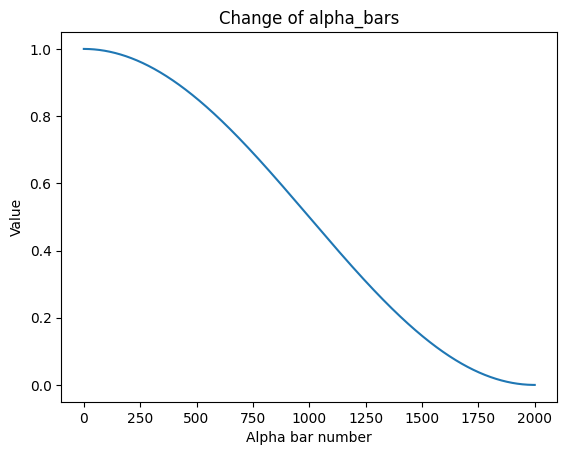

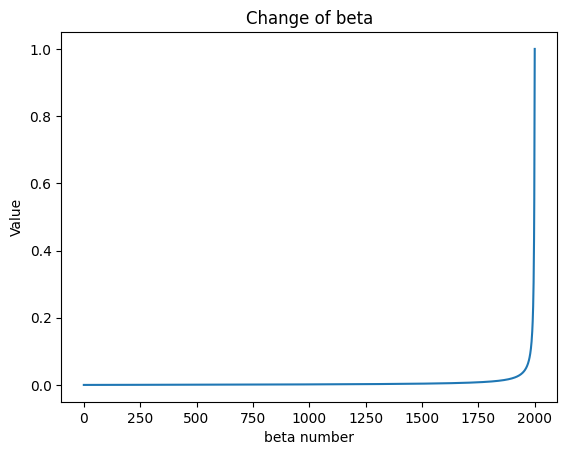

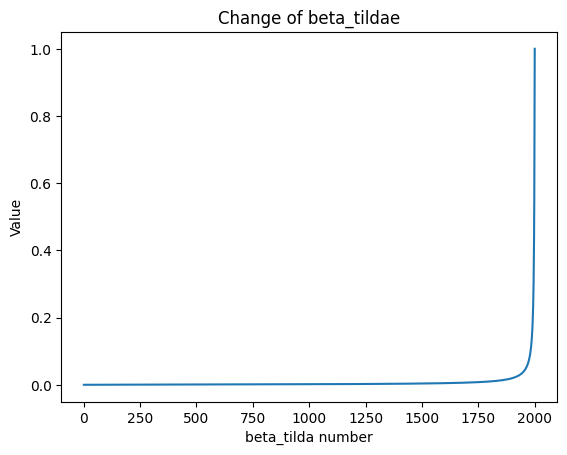

In [6]:
Cosine = CosSchedule(T, 0.0008, 2)

trial_spectrum = torch.tensor(data[0,])

t=10
time_tens = torch.tensor([t])

x_t = Cosine.add_noise(trial_spectrum, t=time_tens)

# Everything works

# Will try plotting the alpha_bars

alpha_bars = Cosine.alpha_bars

alpha = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    alpha[i] = Cosine.alpha_t(time_tens)

beta = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta[i] = Cosine.beta_t(time_tens)

beta_tilda = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_tilda[i] = Cosine.beta_tilda_t(time_tens)

ranges=np.arange(0,T+1, 1)

plt.plot(ranges, alpha)
plt.xlabel("Alpha number")
plt.ylabel("Value")
plt.title("Change of alpha")
plt.show()

plt.plot(ranges, alpha_bars)
plt.xlabel("Alpha bar number")
plt.ylabel("Value")
plt.title("Change of alpha_bars")
plt.show()

plt.plot(ranges, beta)
plt.xlabel("beta number")
plt.ylabel("Value")
plt.title("Change of beta")
plt.show()

plt.plot(ranges, beta_tilda)
plt.xlabel("beta_tilda number")
plt.ylabel("Value")
plt.title("Change of beta_tildae")
plt.show()


C:\Users\egear\AppData\Local\Temp\ipykernel_25504\812415067.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trial_spectrum = torch.tensor(data[0,])


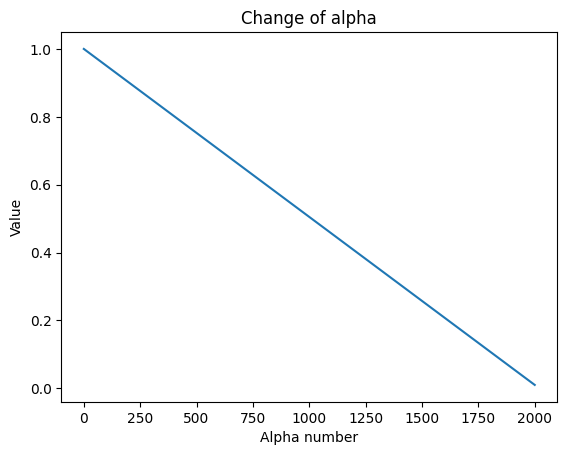

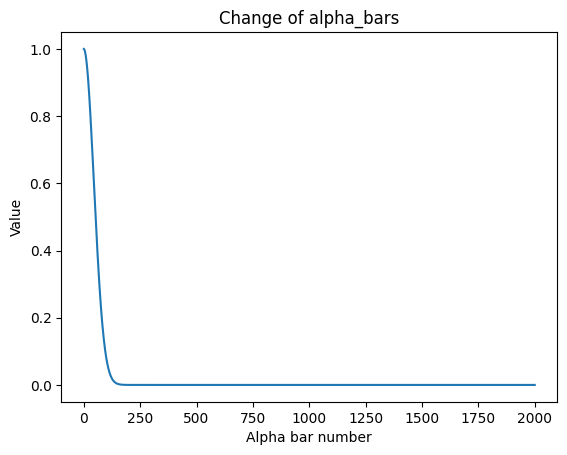

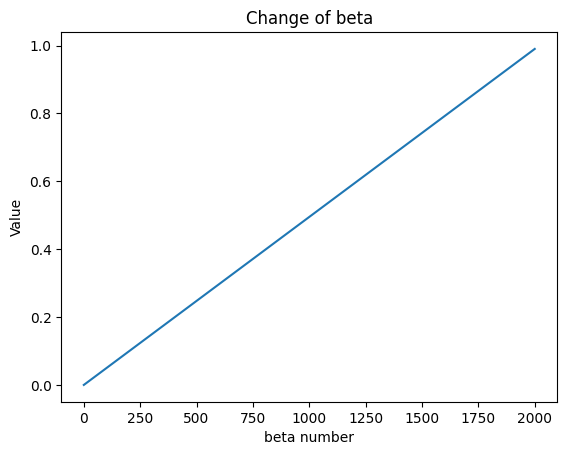

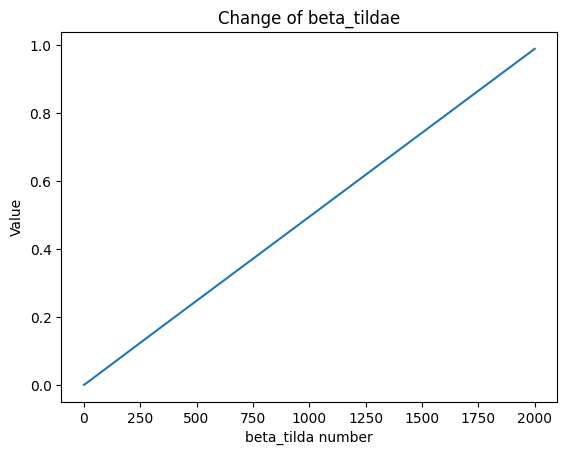

In [7]:
Lin = LinearSchedule(T, 1, 0.01)

trial_spectrum = torch.tensor(data[0,])

t=10
time_tens = torch.tensor([t])

x_t = Lin.add_noise(trial_spectrum, t=time_tens)

# Everything works

# Will try plotting the alpha_bars but for sqrt


alpha_bars_lin = Lin.alpha_bars

alpha_lin = 31*torch.ones_like(alpha_bars_lin)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    alpha_lin[i] = Lin.alpha_t(time_tens)

beta_lin = 31*torch.ones_like(alpha_bars_lin)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_lin[i] = Lin.beta_t(time_tens)

beta_tilda_lin = 31*torch.ones_like(alpha_bars_lin)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_tilda_lin[i] = Lin.beta_tilda_t(time_tens)

ranges=np.arange(0,T+1, 1)

plt.plot(ranges, alpha_lin)
plt.xlabel("Alpha number")
plt.ylabel("Value")
plt.title("Change of alpha")
plt.show()

plt.plot(ranges, alpha_bars_lin)
plt.xlabel("Alpha bar number")
plt.ylabel("Value")
plt.title("Change of alpha_bars")
plt.show()

plt.plot(ranges, beta_lin)
plt.xlabel("beta number")
plt.ylabel("Value")
plt.title("Change of beta")
plt.show()

plt.plot(ranges, beta_tilda_lin)
plt.xlabel("beta_tilda number")
plt.ylabel("Value")
plt.title("Change of beta_tildae")
plt.show()

C:\Users\egear\AppData\Local\Temp\ipykernel_25504\4185106054.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trial_spectrum = torch.tensor(data[0,])


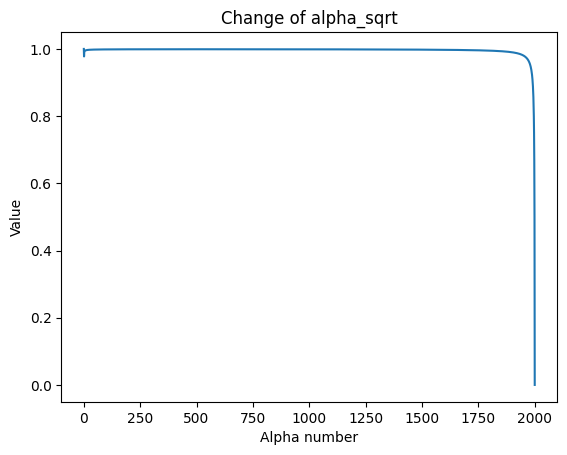

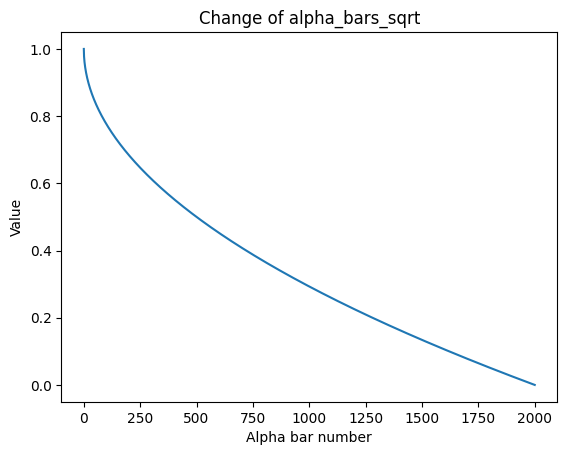

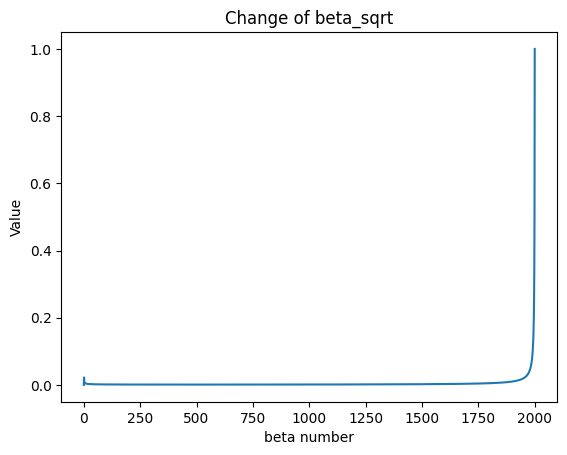

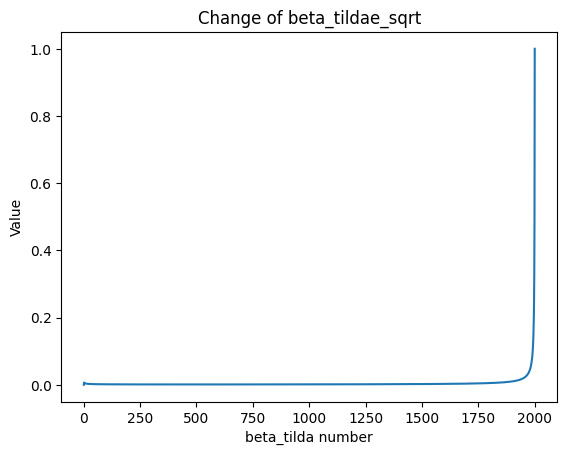

In [8]:
Sqrt = SqrtSchedule(T)

trial_spectrum = torch.tensor(data[0,])

t=10
time_tens = torch.tensor([t])

x_t = Sqrt.add_noise(trial_spectrum, t=time_tens)

# Everything works

# Will try plotting the alpha_bars but for sqrt

alpha_bars_sqrt = Sqrt.alpha_bars

alpha_sqrt = 31*torch.ones_like(alpha_bars_sqrt)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    alpha_sqrt[i] = Sqrt.alpha_t(time_tens)

beta_sqrt = 31*torch.ones_like(alpha_bars_sqrt)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_sqrt[i] = Sqrt.beta_t(time_tens)

beta_tilda_sqrt = 31*torch.ones_like(alpha_bars_sqrt)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_tilda_sqrt[i] = Sqrt.beta_tilda_t(time_tens)

ranges=np.arange(0,T+1, 1)

plt.plot(ranges, alpha_sqrt)
plt.xlabel("Alpha number")
plt.ylabel("Value")
plt.title("Change of alpha_sqrt")
plt.show()

plt.plot(ranges, alpha_bars_sqrt)
plt.xlabel("Alpha bar number")
plt.ylabel("Value")
plt.title("Change of alpha_bars_sqrt")
plt.show()

plt.plot(ranges, beta_sqrt)
plt.xlabel("beta number")
plt.ylabel("Value")
plt.title("Change of beta_sqrt")
plt.show()

plt.plot(ranges, beta_tilda_sqrt)
plt.xlabel("beta_tilda number")
plt.ylabel("Value")
plt.title("Change of beta_tildae_sqrt")
plt.show()

C:\Users\egear\AppData\Local\Temp\ipykernel_25504\3022212377.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trial_spectrum = torch.tensor(data[0,])


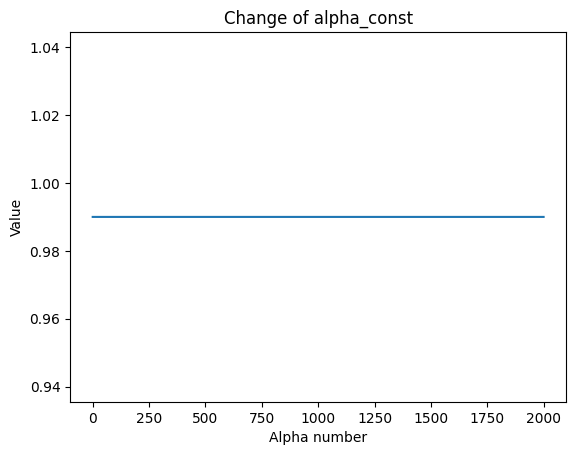

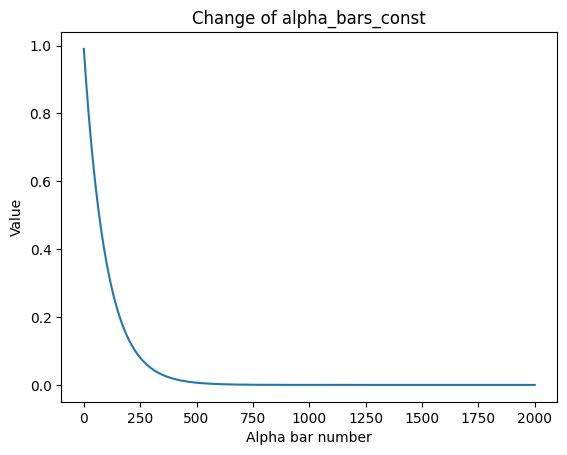

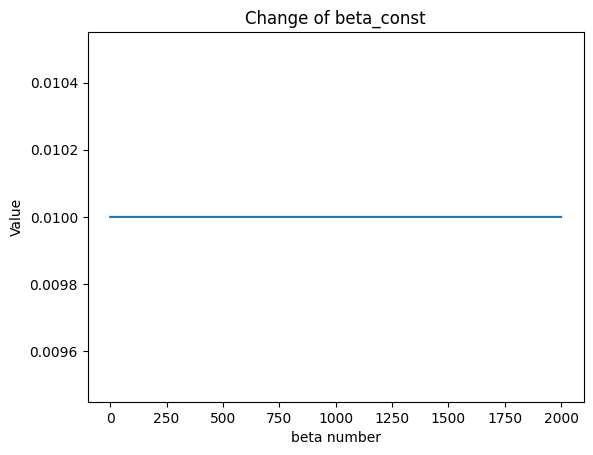

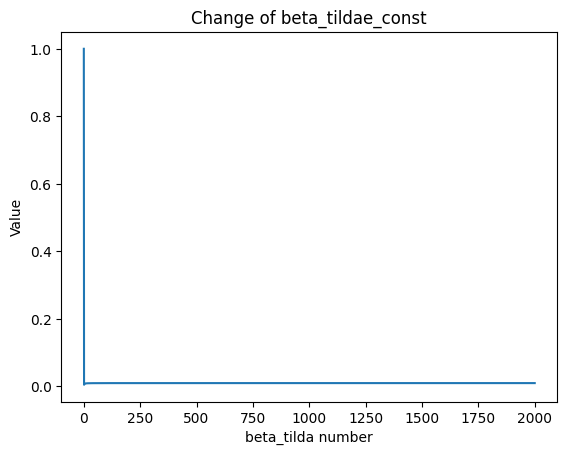

In [9]:
Constant = ConstantSchedule(T, 0.99)

trial_spectrum = torch.tensor(data[0,])

t=10
time_tens = torch.tensor([t])

x_t = Constant.add_noise(trial_spectrum, t=time_tens)

# Everything works

# Will try plotting the alpha_bars

alpha_bars_const = Constant.alpha_bars

alpha_const = 31*torch.ones_like(alpha_bars_const)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    alpha_const[i] = Constant.alpha_t(time_tens)

beta_const = 31*torch.ones_like(alpha_bars_const)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_const[i] = Constant.beta_t(time_tens)

beta_tilda_const = 31*torch.ones_like(alpha_bars_const)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_tilda_const[i] = Constant.beta_tilda_t(time_tens)

ranges=np.arange(0,T+1, 1)

plt.plot(ranges, alpha_const)
plt.xlabel("Alpha number")
plt.ylabel("Value")
plt.title("Change of alpha_const")
plt.show()

plt.plot(ranges, alpha_bars_const)
plt.xlabel("Alpha bar number")
plt.ylabel("Value")
plt.title("Change of alpha_bars_const")
plt.show()

plt.plot(ranges, beta_const)
plt.xlabel("beta number")
plt.ylabel("Value")
plt.title("Change of beta_const")
plt.show()

plt.plot(ranges, beta_tilda_const)
plt.xlabel("beta_tilda number")
plt.ylabel("Value")
plt.title("Change of beta_tildae_const")
plt.show()

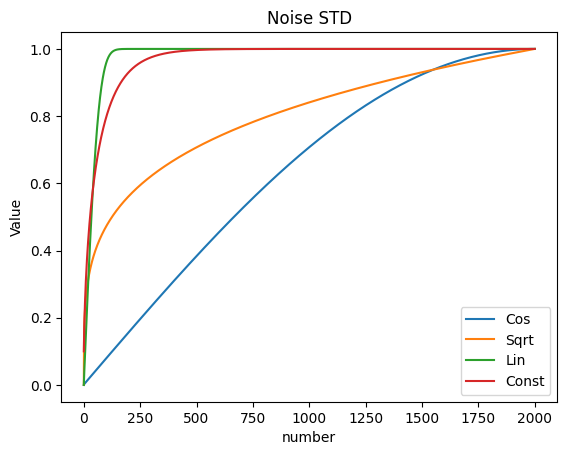

In [ ]:
plt.plot(ranges, torch.sqrt(1-alpha_bars), label="Cos")
plt.plot(ranges, torch.sqrt(1-alpha_bars_sqrt), label="Sqrt")
plt.plot(ranges, torch.sqrt(1-alpha_bars_lin), label="Lin")
plt.plot(ranges, torch.sqrt(1-alpha_bars_const), label="Const")
plt.xlabel("number")
plt.ylabel("Value")
plt.title("Noise STD")
plt.legend()
plt.show()

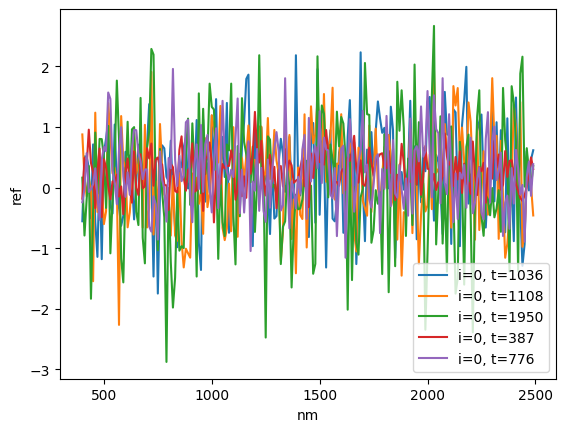

In [64]:
scheduler = Cosine

batch_sim = data[:5].to(device='cuda')
t = torch.randint(low=0, high=scheduler.steps +1, size=(batch_sim.size(0),), device=batch_sim.device)
noise, xT = scheduler.add_noise(batch_sim, t)

# ^^^This proves that the noise scheduler works in batches with cuda.

xT = xT.to('cpu')

wavelengths = torch.arange(400, 2491, 10)

plt.plot(wavelengths, xT[0], label= f"i=0, t={t[0]}")
plt.plot(wavelengths, xT[1], label= f"i=0, t={t[1]}")
plt.plot(wavelengths, xT[2], label= f"i=0, t={t[2]}")
plt.plot(wavelengths, xT[3], label= f"i=0, t={t[3]}")
plt.plot(wavelengths, xT[4], label= f"i=0, t={t[4]}")
plt.xlabel("nm")
plt.ylabel("ref")
plt.legend()
plt.show()


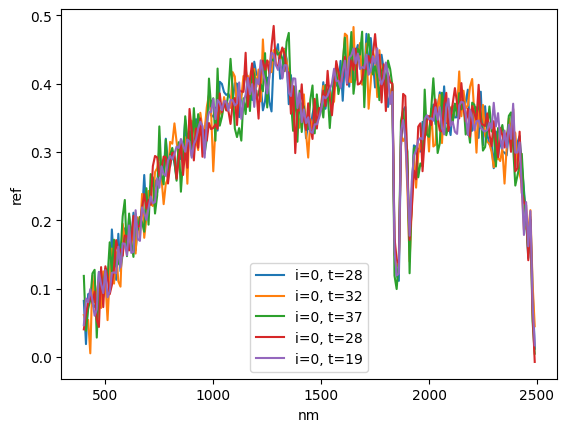

In [96]:
i = 0

uniform_batch_sim = torch.stack([data[i], data[i], data[i], data[i], data[i]]).to(device='cuda')

t = torch.randint(low=0, high=40, size=(batch_sim.size(0),), device=uniform_batch_sim.device)
noise, xT = scheduler.add_noise(uniform_batch_sim, t)

# ^^^This proves that the noise scheduler works in batches with cuda.

xT = xT.to('cpu')

wavelengths = torch.arange(400, 2491, 10)

plt.plot(wavelengths, xT[0], label= f"i=0, t={t[0]}")
plt.plot(wavelengths, xT[1], label= f"i=0, t={t[1]}")
plt.plot(wavelengths, xT[2], label= f"i=0, t={t[2]}")
plt.plot(wavelengths, xT[3], label= f"i=0, t={t[3]}")
plt.plot(wavelengths, xT[4], label= f"i=0, t={t[4]}")
plt.xlabel("nm")
plt.ylabel("ref")
plt.legend()
plt.show()